## Introduction to Gstreamer 

In [2]:
# Check Gstreamer version 
!gst-inspect-1.0 --version

gst-inspect-1.0 version 1.14.5
GStreamer 1.14.5
https://launchpad.net/distros/ubuntu/+source/gstreamer1.0


In [3]:
!gst-launch-1.0 v4l2src ! 'video/x-raw-yuv,width=320,height=240' ! autovideosink


(gst-launch-1.0:14715): GStreamer-WARNING **: 23:29:58.449: 0.10-style raw video caps are being created. Should be video/x-raw,format=(string).. now.


In [4]:
# Does not work 
!gst-launch-1.0 v4l2src ! 'video/x-raw-yuv,width=320,height=240' ! nvdrmvideosink


(gst-launch-1.0:15476): GStreamer-WARNING **: 23:35:18.634: 0.10-style raw video caps are being created. Should be video/x-raw,format=(string).. now.


In [5]:
! gst-launch-1.0 -v  v4l2src device=/dev/video0 ! nvdrmvideosink -e

Setting pipeline to PAUSED ...
Pipeline is live and does not need PREROLL ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
/GstPipeline:pipeline0/GstV4l2Src:v4l2src0.GstPad:src: caps = video/x-raw, width=(int)2304, height=(int)1536, format=(string)YUY2, pixel-aspect-ratio=(fraction)1/1, framerate=(fraction)2/1, colorimetry=(string)bt709, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstNvDrmVideoSink:nvdrmvideosink0.GstPad:sink: caps = video/x-raw, width=(int)2304, height=(int)1536, format=(string)YUY2, pixel-aspect-ratio=(fraction)1/1, framerate=(fraction)2/1, colorimetry=(string)bt709, interlace-mode=(string)progressive
Caught SIGSEGV
#0  0x0000007f8a005e28 in __GI___poll (fds=0x55750199c0, nfds=547777229704, timeout=<optimized out>) at ../sysdeps/unix/sysv/linux/poll.c:41
#1  0x0000007f8a112f58 in  () at /usr/lib/aarch64-linux-gnu/libglib-2.0.so.0
#2  0x0000005574eb42d0 in  ()
Spinning.  Please run 'gdb gst-launch-1.0 15628' to continue debugging, Ctrl-C to 

In [7]:
! gst-launch-1.0 -v  v4l2src device=/dev/video0 ! nvoverlaysink -e

Setting pipeline to PAUSED ...
Pipeline is live and does not need PREROLL ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
/GstPipeline:pipeline0/GstV4l2Src:v4l2src0.GstPad:src: caps = video/x-raw, width=(int)2304, height=(int)1536, framerate=(fraction)2/1, format=(string)YUY2, pixel-aspect-ratio=(fraction)1/1, colorimetry=(string)bt709, interlace-mode=(string)progressive
ERROR: from element /GstPipeline:pipeline0/GstV4l2Src:v4l2src0: Internal data stream error.
Additional debug info:
gstbasesrc.c(3055): gst_base_src_loop (): /GstPipeline:pipeline0/GstV4l2Src:v4l2src0:
streaming stopped, reason not-negotiated (-4)
EOS on shutdown enabled -- waiting for EOS after Error
Waiting for EOS...
^C
handling interrupt.
Interrupt: Stopping pipeline ...
Interrupt while waiting for EOS - stopping pipeline...
Execution ended after 0:00:13.746571368
Setting pipeline to PAUSED ...
Setting pipeline to READY ...


In [1]:
# Works but does not show 
! gst-launch-1.0 -v  v4l2src device=/dev/video0 ! nveglglessink -e

Setting pipeline to PAUSED ...

Using winsys: x11 
Pipeline is live and does not need PREROLL ...
Got context from element 'eglglessink0': gst.egl.EGLDisplay=context, display=(GstEGLDisplay)NULL;
Setting pipeline to PLAYING ...
New clock: GstSystemClock
ERROR: from element /GstPipeline:pipeline0/GstV4l2Src:v4l2src0: Internal data stream error.
Additional debug info:
gstbasesrc.c(3055): gst_base_src_loop (): /GstPipeline:pipeline0/GstV4l2Src:v4l2src0:
streaming stopped, reason not-negotiated (-4)
EOS on shutdown enabled -- waiting for EOS after Error
Waiting for EOS...
^C
handling interrupt.
Interrupt: Stopping pipeline ...
Interrupt while waiting for EOS - stopping pipeline...
Execution ended after 0:00:11.710059036
Setting pipeline to PAUSED ...
Setting pipeline to READY ...
Setting pipeline to NULL ...
Freeing pipeline ...


In [2]:
# Run in shell and kill process in shell
!gst-launch-1.0 filesrc location=./sample_stream/sample_1080p_h264.mp4 ! h264parse ! omxh264dec ! nveglglessink -e

Setting pipeline to PAUSED ...

Using winsys: x11 
Pipeline is PREROLLING ...
Got context from element 'eglglessink0': gst.egl.EGLDisplay=context, display=(GstEGLDisplay)NULL;

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_caps_is_empty: assertion 'GST_IS_CAPS (caps)' failed

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_caps_truncate: assertion 'GST_IS_CAPS (caps)' failed

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_caps_fixate: assertion 'GST_IS_CAPS (caps)' failed

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_caps_get_structure: assertion 'GST_IS_CAPS (caps)' failed

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_structure_get_string: assertion 'structure != NULL' failed

(gst-launch-1.0:12024): GStreamer-CRITICAL **: 23:59:02.753: gst_mini_object_unref: assertion 'mini_object != NULL' failed
NvMMLiteOpen : Block : BlockType = 261 
NVMEDIA: Reading vendor.tegra.display-size : status: 6 


In [2]:
!gst-launch-1.0 videotestsrc num-buffers=4 ! jpegenc ! filesink location=videotestsrc-frame.jpg

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
Got EOS from element "pipeline0".
Execution ended after 0:00:00.038682838
Setting pipeline to PAUSED ...
Setting pipeline to READY ...
Setting pipeline to NULL ...
Freeing pipeline ...


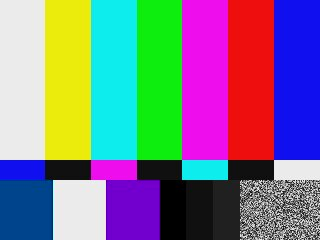

In [3]:
from IPython.display import Video, Image
Image("videotestsrc-frame.jpg")

In [8]:
!gst-launch-1.0 filesrc location=./sample_stream/sample_1080p_h264.mp4 num-buffers=4 ! jpegenc ! filesink location=videotestsrc-frame.jpg

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
ERROR: from element /GstPipeline:pipeline0/GstJpegEnc:jpegenc0: GStreamer error: negotiation problem.
Additional debug info:
gstvideoencoder.c(1559): gst_video_encoder_chain (): /GstPipeline:pipeline0/GstJpegEnc:jpegenc0:
encoder not initialized
ERROR: pipeline doesn't want to preroll.
Setting pipeline to NULL ...
Freeing pipeline ...


### GstVideoTestSrcPattern

```smpte (0) – SMPTE 100%% color bars
snow (1) – Random (television snow)
black (2) – 100%% Black
white (3) – 100%% White
red (4) – Red
green (5) – Green
blue (6) – Blue
checkers-1 (7) – Checkers 1px
checkers-2 (8) – Checkers 2px
checkers-4 (9) – Checkers 4px
checkers-8 (10) – Checkers 8px
circular (11) – Circular
blink (12) – Blink
smpte75 (13) – SMPTE 75%% color bars
zone-plate (14) – Zone plate
gamut (15) – Gamut checkers
chroma-zone-plate (16) – Chroma zone plate
solid-color (17) – Solid color
ball (18) – Moving ball
smpte100 (19) – SMPTE 100%% color bars
bar (20) – Bar
pinwheel (21) – Pinwheel
spokes (22) – Spokes
gradient (23) – Gradient
colors (24) – Colors
smpte-rp-219 (25) – SMPTE test pattern, RP 219 conformant
```


In [20]:
!gst-launch-1.0 -v videotestsrc pattern=gamut num-buffers=4 ! jpegenc ! filesink location=videotestsrc-gamut.jpg

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
/GstPipeline:pipeline0/GstVideoTestSrc:videotestsrc0.GstPad:src: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:sink: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:src: caps = image/jpeg, sof-marker=(int)0, width=(int)320, height=(int)240, pixel-aspect-ratio=(fraction)1/1, framerate=(fraction)30/1, interlace-mode=(string)progressive, colorimetry=(string)bt601, chroma-site=(string)jpeg, multiview-mode=(string)mono, multiview-flags=(GstVideoMultiviewFlagsSet)0:ffffffff:/right-view-first/left-flipped/left-flopped/right-flipped/right-flo

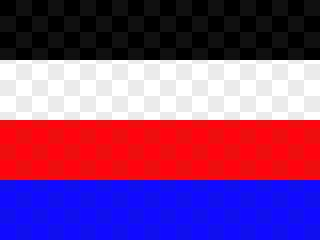

In [21]:
Image("videotestsrc-gamut.jpg")

In [18]:
!gst-launch-1.0 -v videotestsrc pattern=bar num-buffers=4 ! jpegenc ! filesink location=videotestsrc-frame-bar.jpg

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
/GstPipeline:pipeline0/GstVideoTestSrc:videotestsrc0.GstPad:src: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:sink: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:src: caps = image/jpeg, sof-marker=(int)0, width=(int)320, height=(int)240, pixel-aspect-ratio=(fraction)1/1, framerate=(fraction)30/1, interlace-mode=(string)progressive, colorimetry=(string)bt601, chroma-site=(string)jpeg, multiview-mode=(string)mono, multiview-flags=(GstVideoMultiviewFlagsSet)0:ffffffff:/right-view-first/left-flipped/left-flopped/right-flipped/right-flo

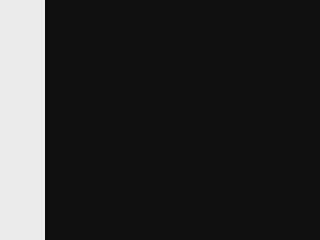

In [19]:
Image("videotestsrc-frame-bar.jpg")

In [15]:
!gst-launch-1.0 -v videotestsrc pattern=pinwheel num-buffers=4 ! jpegenc ! filesink location=videotestsrc-frame-pinwheel.jpg

Setting pipeline to PAUSED ...
Pipeline is PREROLLING ...
/GstPipeline:pipeline0/GstVideoTestSrc:videotestsrc0.GstPad:src: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:sink: caps = video/x-raw, width=(int)320, height=(int)240, framerate=(fraction)30/1, format=(string)I420, multiview-mode=(string)mono, pixel-aspect-ratio=(fraction)1/1, interlace-mode=(string)progressive
/GstPipeline:pipeline0/GstJpegEnc:jpegenc0.GstPad:src: caps = image/jpeg, sof-marker=(int)0, width=(int)320, height=(int)240, pixel-aspect-ratio=(fraction)1/1, framerate=(fraction)30/1, interlace-mode=(string)progressive, colorimetry=(string)bt601, chroma-site=(string)jpeg, multiview-mode=(string)mono, multiview-flags=(GstVideoMultiviewFlagsSet)0:ffffffff:/right-view-first/left-flipped/left-flopped/right-flipped/right-flo

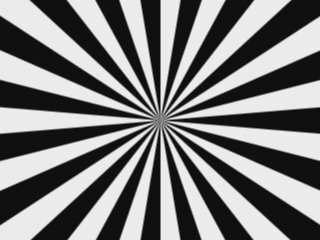

In [17]:
Image("videotestsrc-frame-pinwheel.jpg")

In [23]:
# Remove all images 
rm -rf  videotestsrc-frame-bar.jpg videotestsrc-frame-pinwheel.jpg videotestsrc-gamut.jpg